# TP 3 Regression linéaire
Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [178]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [181]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=int)
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [360]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2];
y = y.reshape(-1,1)

In [271]:
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [236]:
# pour une valeur donnée, cette fonction calculera sa sigmoid


def sigmoid(z):
    """Fonction sigmoïde"""
    return 1 / (1 + np.exp(-z))


    
 

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [287]:
# idéalement, tracer le coût à chaque itération pour s'assurer que la descente du gradient est correcte
    
    # calculer le coût avec et sans vectorisation, 
    # comparer le temps de traitement
def computeCost(theta, X, y):
    """Fonction de coût logistique"""
    e = 1e-14
    y_pred = np.clip(sigmoid(np.dot(X, theta)), e, 1 - e)

    return -(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)).mean(axis=0)
  

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [312]:

def gradient_descent(X, y, theta, alpha, num_iters):
    costs = []
    for _ in range(num_iters):
        y_hat = sigmoid(np.dot(X, theta))
        
        error = sigmoid(y_hat)- y
        
        cost = computeCost(theta, X, y)
        costs.append(cost)
        
        gradient = np.dot(X.T, error) / 100
        theta = theta - alpha * gradient
    return theta, np.asarray(costs)

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [354]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta.shape

(3, 1)

Calculer le cout initial

In [355]:
initialCost=computeCost(theta, X, y)
print(initialCost)

[0.69314718]


Appel des la fonction de calcul du gradient

In [356]:
# paramètres
num_iters = 5000;
alpha = 0.01;
# Appel
theta, costs= gradient_descent(X, y, theta, alpha,num_iters);
print(theta)



[[-3.65422825]
 [ 0.33292157]
 [ 0.05421358]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [340]:
def drawLine(X, y, theta):
    plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
    plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')
    x1_min, x1_max = X[:, 1].min(), X[:, 1].max()
    x2_min, x2_max = (-(theta[1] * x1_min + theta[0]) / theta[2])[0], (-(theta[1] * x1_max + theta[0]) / theta[2])[0]

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("decision boundary")
    plt.plot([x1_min, x1_max], [x2_min, x2_max])
    

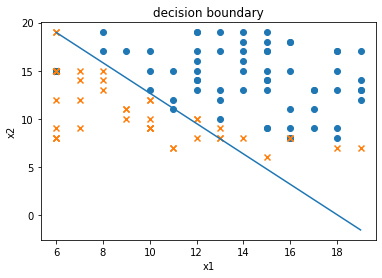

In [341]:

drawLine(X, y, theta)

# Affichage 
Graphe representant les acceptations selon les caracteristiques

Text(0, 0.5, 'Note module 2')

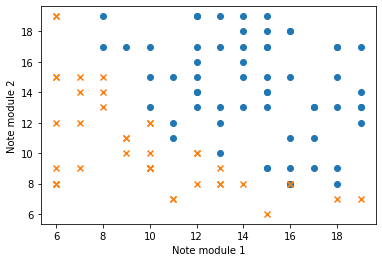

In [25]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte",marker ='x')

plt.xlabel('Note module 1')
plt.ylabel('Note module 2')

Traçage du coût en fonction de theta0 et theta1

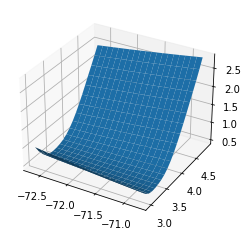

In [346]:
theta_0_range, theta_1_range = np.meshgrid(np.arange(theta[0] - 1, theta[0] + 1, 0.1), 
                                           np.arange(theta[1] - 1, theta[1] + 1, 0.1))
theta_mesh = np.expand_dims(np.stack((theta_0_range, theta_1_range), axis=-1), axis=3)
loss = np.asarray(
    [
        [computeCost(np.concatenate((theta_mesh[i, j], np.expand_dims(theta[2], axis=1)), axis=0),X, y)[0]
             for j in range(theta_mesh.shape[1])
        ] 
        for i in range(theta_mesh.shape[0])
    ]
)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta_0_range, theta_1_range, loss)

Prédire des valeurs de y

In [357]:
# Predire pour des notes note1= 9 et note2=17
x = np.array([[8,9, 17]])
np.dot(x,theta)

array([[-25.31590106]])

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [365]:

lr_model = LogisticRegression()
lr_model.fit(X, np.squeeze(y, axis=1))
#le theta de sklearn
theta_sk = lr_model.coef_
print(theta_sk)


[[-5.46675316e-08  9.45433340e-01  9.10032400e-01]]


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes